# Car Price Prediction Project!! 🚗

## Problem :
Training a car price prediction model to determine the optimal price of the car depending on certain factors like goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more.

## Data :
The dataset can be found on kaggle.

https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars

## Features: 

These are the features used in the dataset :

1. Car_Name
2. Year
3. Selling_Price
4. Present_Price
5. Kms_Driven
6. Fuel_Type
7. Seller_Type
8. Transmission
9. Owner

## Model Building :
Since this is a regression problem, we will be using RandomForestRegressor as our baseline model.

## Evaluation metric :
we will be using different regression evaluation metrics like RMSE(root mean squared error), MSE(mean squared error), MAE(mean asbolute error), R2 error(R squared error), MAPE (mean absolute percentage error).

## Preparing the required tools 

In [111]:
#import all the EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#modelling libraries 
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [112]:
#load the data 
car_data = pd.read_csv("C:\\Users\\aryas\\OneDrive\\Desktop\\car_data - Copy.csv")

In [113]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [114]:
len(car_data)

301

In [115]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [116]:
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


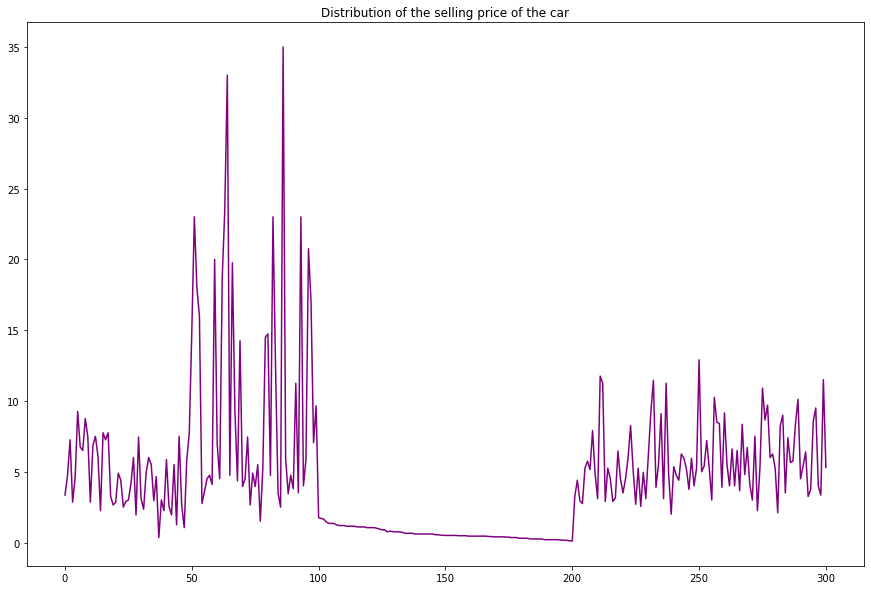

In [117]:
#check the distribution of the target variable (selling price)
car_data["Selling_Price"].plot(figsize = (15,10), color = "purple")
plt.title("Distribution of the selling price of the car");

In [118]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


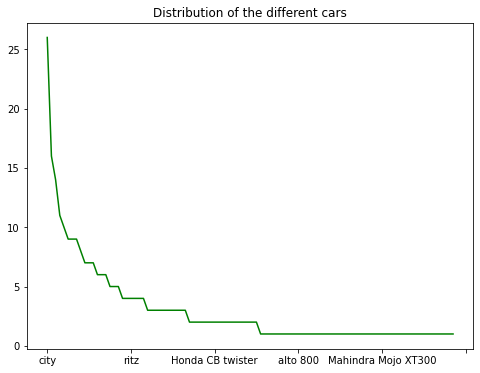

In [119]:
car_data["Car_Name"].value_counts().plot(figsize = (8,6), color ="green")
plt.title("Distribution of the different cars");

In [120]:
#comparing the car name with the target variable
pd.crosstab(car_data["Car_Name"], car_data["Selling_Price"])

Selling_Price,0.10,0.12,0.15,0.16,0.17,0.18,0.20,0.25,0.27,0.30,...,17.00,18.00,18.75,19.75,19.99,20.75,23.00,23.50,33.00,35.00
Car_Name,,,,,,,,,,,,,,,,,,,,,
800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Activa 3g,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Activa 4g,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bajaj ct 100,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bajaj Avenger 150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sx4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
verna,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vitara brezza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


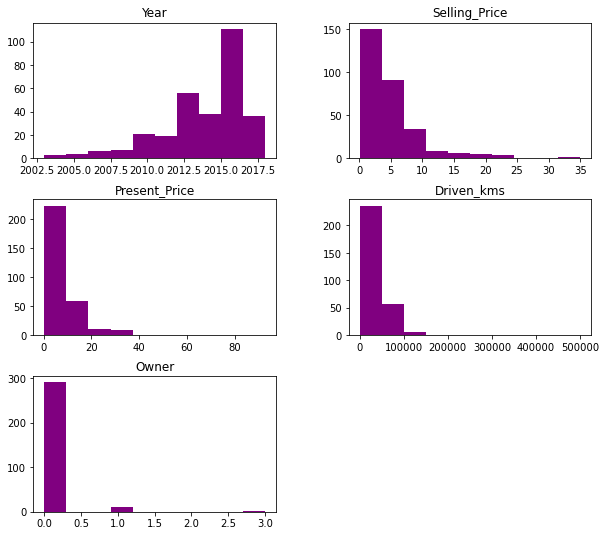

In [121]:
#let's check the overall distribution of the dataset
car_data.hist(figsize = (10,9), grid= False, color =["purple"]);

In [122]:
#check the dtypes
car_data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [123]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


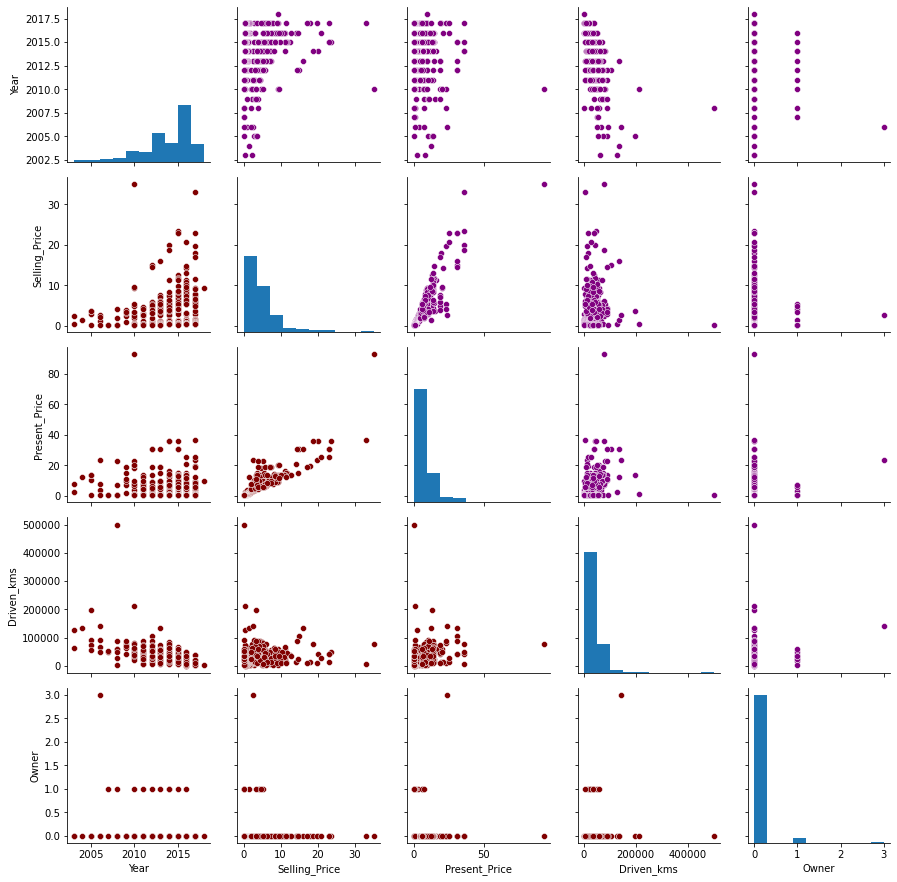

In [124]:
#visualizing all the features present in the car dataset
g = sns.PairGrid(car_data)
g.map_upper(sns.scatterplot,color='purple')
g.map_lower(sns.scatterplot, color='maroon')
g.map_diag(plt.hist);

In [125]:
car_data["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

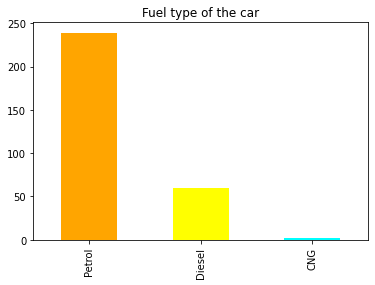

In [126]:
#visualize the fuel type
car_data["Fuel_Type"].value_counts().plot(kind = "bar", color = ["orange","yellow","cyan"])
plt.title("Fuel type of the car");

In [127]:
#check for missing values
car_data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

## Since there are no missing values, now Let's convert all the non numerical data types to a usable numerical format :)

### Fuel type :

1. petrol -0
2. Diesel - 1
3. CNG - 2

In [128]:
#using the map function
car_data["Fuel_Type"] = car_data["Fuel_Type"].map({"Petrol":0,"Diesel":1, "CNG":2})

### Selling type :
1. Dealer - 0
2. Individual -1

In [129]:
car_data["Selling_type"].value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

In [130]:
car_data["Selling_type"] = car_data["Selling_type"].map({"Dealer":0, "Individual":1})

### Transmission :
1. Manual -0
2. Automatic -1

In [131]:
car_data["Transmission"].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [132]:
#using map to convert it
car_data["Transmission"] = car_data["Transmission"].map({"Manual":0,"Automatic":1})

In [133]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


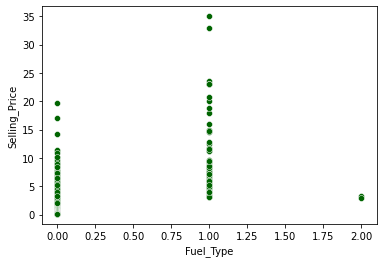

In [134]:
#compare the fuel type to the target variable 
sns.scatterplot(x= car_data["Fuel_Type"], y=car_data["Selling_Price"], color = ["darkgreen"]);

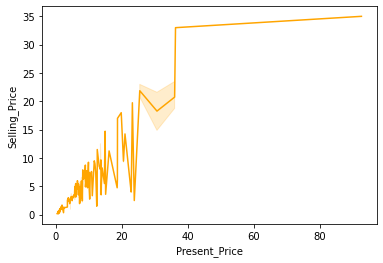

In [135]:
#plotting the present price with respect to the selling price
sns.lineplot(x=car_data["Present_Price"], y=car_data["Selling_Price"], color = "orange");

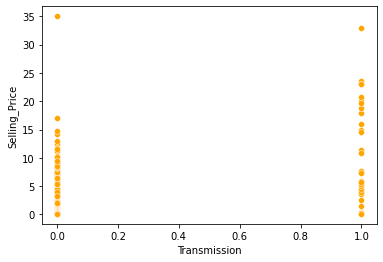

In [136]:
#compare the transmission to the selling price
sns.scatterplot(x = car_data["Transmission"], y=car_data["Selling_Price"], color = "orange");

In [137]:
#correlataion matrix
car_data.corr()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,0.053643,-0.039896,-0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,0.509467,-0.550724,0.367128,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.440493,-0.512121,0.348776,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.166801,-0.101419,0.162510,0.089216
Fuel_Type,0.053643,0.509467,0.440493,0.166801,1.000000,-0.352415,0.080466,-0.055705
Selling_type,-0.039896,-0.550724,-0.512121,-0.101419,-0.352415,1.000000,-0.063240,0.124269
Transmission,-0.000394,0.367128,0.348776,0.162510,0.080466,-0.063240,1.000000,0.050316
Owner,-0.182104,-0.088344,0.008058,0.089216,-0.055705,0.124269,0.050316,1.000000


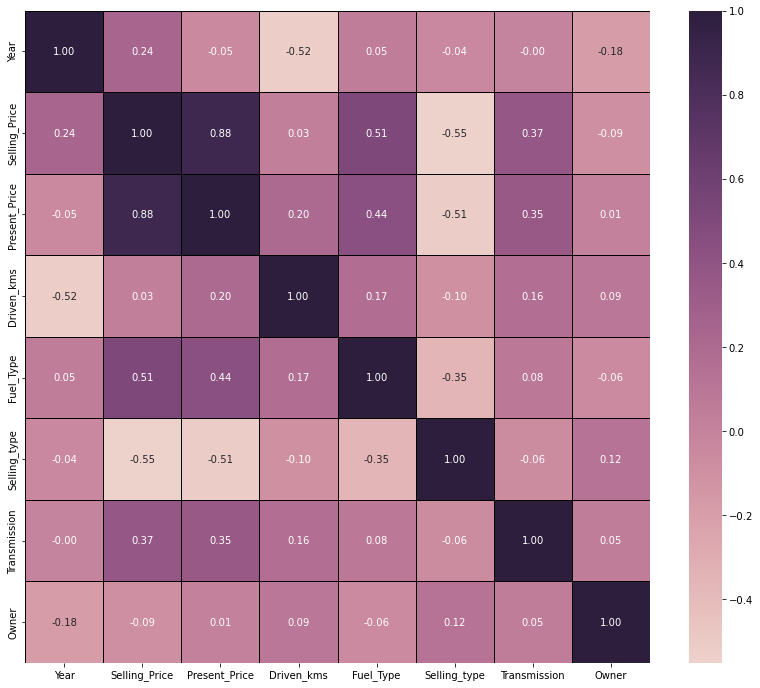

In [138]:
#visually represent the correlation matrix using a heatmap
plt.figure(figsize = (14,12))
sns.heatmap(data= car_data.corr(),annot= True, fmt= ".2f", cmap=sns.cubehelix_palette(as_cmap=True), linecolor= "black",
            linewidths=0.5)
plt.xticks(rotation = 0);

## modelling :

In [139]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [140]:
#drop the columns which are not required now
car_data = car_data.drop("Car_Name", axis =1)

In [141]:
car_data

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,0,0
297,2015,4.00,5.90,60000,0,0,0,0
298,2009,3.35,11.00,87934,0,0,0,0
299,2017,11.50,12.50,9000,1,0,0,0


In [142]:
#check dtypes 
car_data.dtypes

Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type          int64
Selling_type       int64
Transmission       int64
Owner              int64
dtype: object

In [143]:
#split the data into feature and target variables
x = car_data.drop("Selling_Price", axis = 1)
y = car_data["Selling_Price"]

In [144]:
x.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [145]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [146]:
#split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#instantiate the regressor model
model = RandomForestRegressor()

#fit the model to the training data
model.fit(x_train, y_train)

RandomForestRegressor()

In [147]:
#score the model on the test data (R2 score or coefficient of determinantion)
model.score(x_test, y_test)

0.9580642628072362

In [148]:
#predict on the test data
y_preds = model.predict(x_test)

In [149]:
y_preds

array([ 0.4496, 10.6688,  4.9395,  0.2105,  7.7216,  6.474 ,  1.0946,
        0.5851,  0.4735,  6.8135,  7.7885,  1.0735,  8.0689,  0.4594,
        5.347 ,  2.4045,  1.1481, 14.0536,  0.4733,  1.567 ,  0.3533,
        8.1479,  4.719 ,  2.726 ,  0.5078,  3.5755,  5.3555,  3.169 ,
        1.1971,  1.1672,  0.4377,  9.5505,  0.4622,  2.6105,  7.6948,
        4.188 ,  6.3435,  6.5428,  2.466 ,  7.0404,  4.5168,  3.3069,
        4.851 ,  0.5584,  6.2685,  0.7259,  8.137 ,  6.6605,  2.776 ,
        3.5465,  4.993 ,  1.5046, 21.9946, 20.1071,  6.531 , 10.2125,
        5.1425,  8.914 ,  2.76  ,  6.6   ,  0.2489])

In [150]:
y_test

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64

### evaluation :

In [151]:
mean_squared_error(y_test, y_preds)

0.9660142185245902

In [152]:
mean_absolute_error(y_test, y_preds)

0.6467721311475414

In [153]:
mean_absolute_percentage_error(y_test, y_preds)

0.16947297211715032

In [154]:
df_preds = pd.DataFrame()
df_preds["selling_price"] = y_preds
df_preds

,selling_price
0,0.4496
1,10.6688
2,4.9395
3,0.2105
4,7.7216
...,...
56,5.1425
57,8.9140
58,2.7600
59,6.6000
